In [ ]:

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
spotify =pd.read_csv('/content/drive/MyDrive/clases data science/SpotifyFeatures.csv')
spotify.head(100)

genre         artist_name                        track_name  \
0   Movie      Henri Salvador       C'est beau de faire un Show   
1   Movie   Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2   Movie     Joseph Williams    Don't Let Me Be Lonely Tonight   
3   Movie      Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4   Movie        Fabien Nataf                         Ouverture   
..    ...                 ...                               ...   
95  Movie        Claire Guyot           Assise au bord du monde   
96  Movie              Chorus      Koti Chennaya(Vol.1 &amp; 2)   
97  Movie      Henri Salvador       Dis-moi qu'tu m'aimes, rock   
98  Movie  Richard M. Sherman                  Forgotten Dreams   
99  Movie              Chorus     High (feat. Syross & Messieh)   

                  track_id  popularity  acousticness  danceability  \
0   0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1   0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2   0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3   0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4   0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   
..                     ...         ...           ...           ...   
95  3JldnhrVM001MJHN7GsB3T           0         0.744         0.193   
96  3NXlNZSmjO3DsJ3DQuyU8e           0         0.840         0.688   
97  3Ng7AEyRUZxPgDgVW2jZoM           1         0.844         0.592   
98  3PyfS1XmjHk1JZ004a2bFZ           0         0.987         0.429   
99  3R3vtgh4lKgRFtkrfrrUQs           0         0.414         0.642   

    duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0         99373  0.9100          0.000000  C#    0.3460    -1.828  Major   
1        137373  0.7370          0.000000  F#    0.1510    -5.559  Minor   
2        170267  0.1310          0.000000   C    0.1030   -13.879  Minor   
3        152427  0.3260          0.000000  C#    0.0985   -12.178  Major   
4         82625  0.2250          0.123000   F    0.2020   -21.150  Major   
..          ...     ...               ...  ..       ...       ...    ...   
95       234754  0.4770          0.000074   F    0.1730    -9.086  Major   
96      3435625  0.3310          0.000000   F    0.0673    -8.645  Major   
97       156267  0.6320          0.000000   F    0.0908    -4.170  Minor   
98        89947  0.0478          0.959000   E    0.1020   -14.170  Minor   
99       154176  0.6300          0.000000  A#    0.1450    -5.814  Minor   

    speechiness    tempo time_signature  valence  
0        0.0525  166.969            4/4    0.814  
1        0.0868  174.003            4/4    0.816  
2        0.0362   99.488            5/4    0.368  
3        0.0395  171.758            4/4    0.227  
4        0.0456  140.576            4/4    0.390  
..          ...      ...            ...      ...  
95       0.0430   77.528            4/4    0.191  
96       0.7720  102.244            4/4    0.529  
97       0.1440   87.819            4/4    0.748  
98       0.0468   82.388            4/4    0.111  
99       0.1870  149.973            4/4    0.190  

[100 rows x 18 columns]

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
display(spotify[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].describe())

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

In [ ]:
#Este código verifica y muestra el número de valores faltantes en cada columna - spotify.

In [ ]:
print(spotify.isnull().sum())

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


llenado de espacios

In [ ]:
spotify['track_name'] = spotify['track_name'].fillna('Unknown Track')
print(spotify.isnull().sum())

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [ ]:
# Select numerical columns for normalization
numerical_cols = spotify.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
spotify[numerical_cols] = scaler.fit_transform(spotify[numerical_cols])

# Display the first few rows of the normalized DataFrame to verify
display(spotify.head())

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')


genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV   -2.261007      0.683376     -0.890935   
1  0BjC1NfoEOOusryehmNudP   -2.206031     -0.345467      0.191994   
2  0CoSDzoNIKCRs124s9uTVy   -2.096080      1.644570      0.585296   
3  0Gc6TVm52BwZD07Ki6tIvf   -2.261007      0.942701     -1.693703   
4  0IuslXpMROHdEPvSl1fTQK   -2.041104      1.638932     -1.203422   

   duration_ms    energy  instrumentalness key  liveness  loudness   mode  \
0    -1.141368  1.286908         -0.489819  C#  0.660661  1.290703  Major   
1    -0.821867  0.630249         -0.489819  F# -0.322835  0.668683  Minor   
2    -0.545298 -1.669954         -0.489819   C -0.564927 -0.718402  Minor   
3    -0.695295 -0.929789         -0.489819  C# -0.587623 -0.434817  Major   
4    -1.282184 -1.313157         -0.083566   F -0.065613 -1.930601  Major   

   speechiness     tempo time_signature   valence  
0    -0.367970  1.595607            4/4  1.380744  
1    -0.183082  1.823253            4/4  1.388435  
2    -0.455832 -0.588326            5/4 -0.334212  
3    -0.438044  1.750597            4/4 -0.876384  
4    -0.405163  0.741433            4/4 -0.249618

Análisis PCA

/tmp/ipython-input-32-3001461352.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=spotify['valence'], y=spotify[column], palette='Set1')


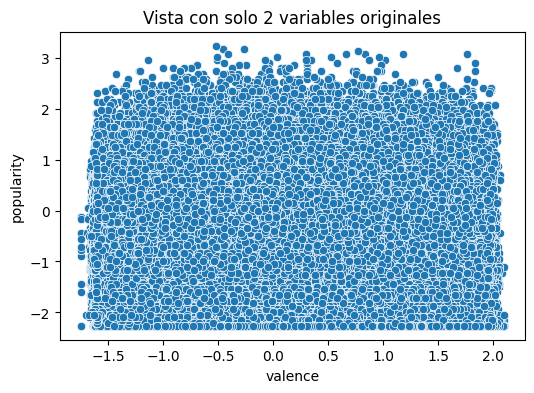

/tmp/ipython-input-32-3001461352.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=spotify['valence'], y=spotify[column], palette='Set1')


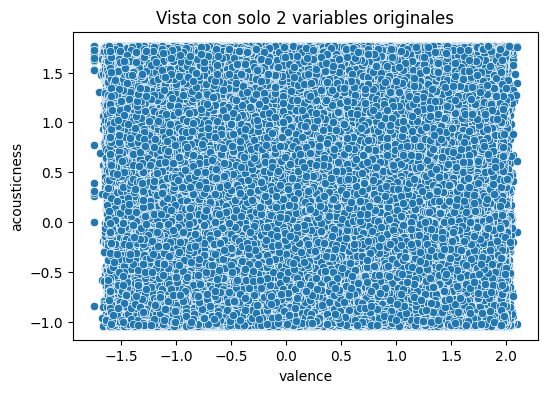

/tmp/ipython-input-32-3001461352.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=spotify['valence'], y=spotify[column], palette='Set1')


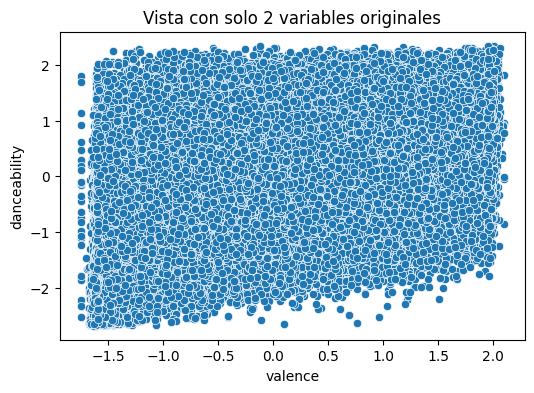

/tmp/ipython-input-32-3001461352.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=spotify['valence'], y=spotify[column], palette='Set1')


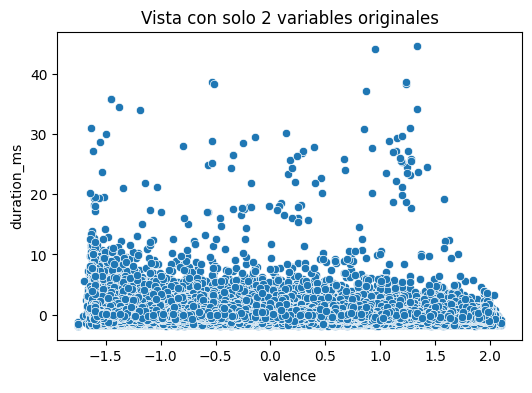

/tmp/ipython-input-32-3001461352.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=spotify['valence'], y=spotify[column], palette='Set1')


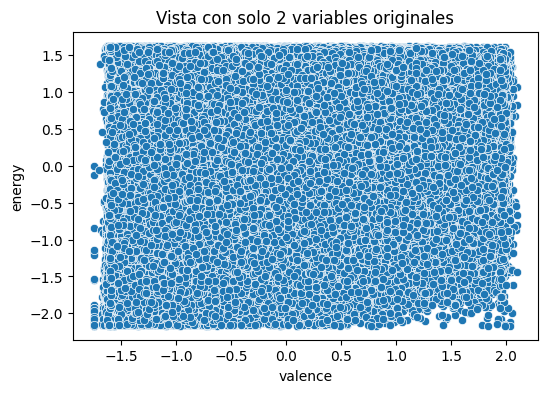

/tmp/ipython-input-32-3001461352.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=spotify['valence'], y=spotify[column], palette='Set1')


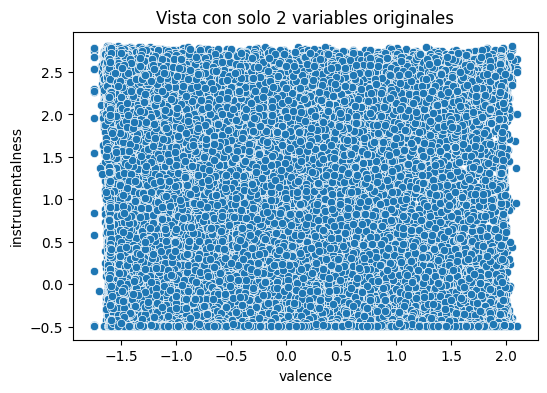

/tmp/ipython-input-32-3001461352.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=spotify['valence'], y=spotify[column], palette='Set1')


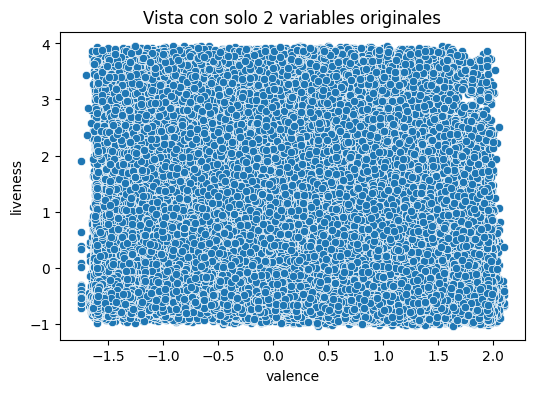

/tmp/ipython-input-32-3001461352.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=spotify['valence'], y=spotify[column], palette='Set1')


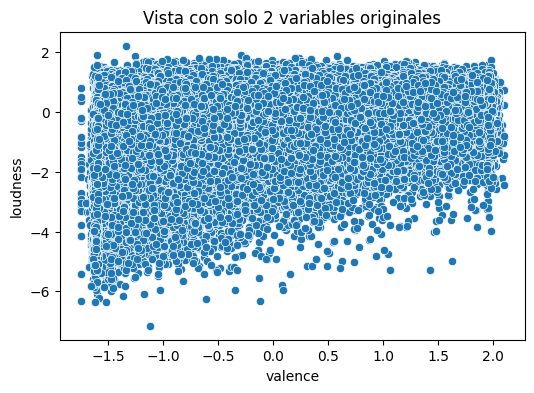

/tmp/ipython-input-32-3001461352.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=spotify['valence'], y=spotify[column], palette='Set1')


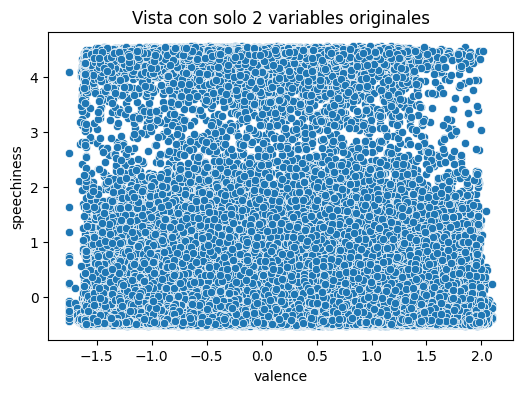

/tmp/ipython-input-32-3001461352.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=spotify['valence'], y=spotify[column], palette='Set1')


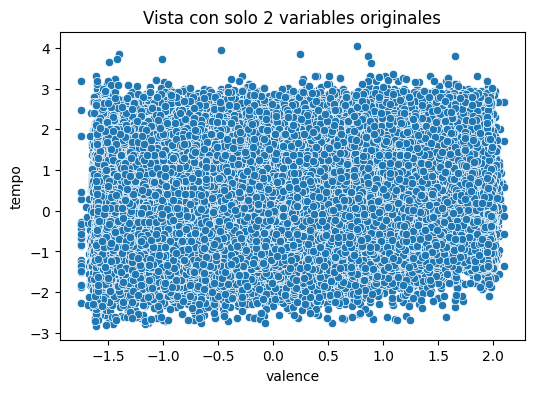

/tmp/ipython-input-32-3001461352.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=spotify['valence'], y=spotify[column], palette='Set1')


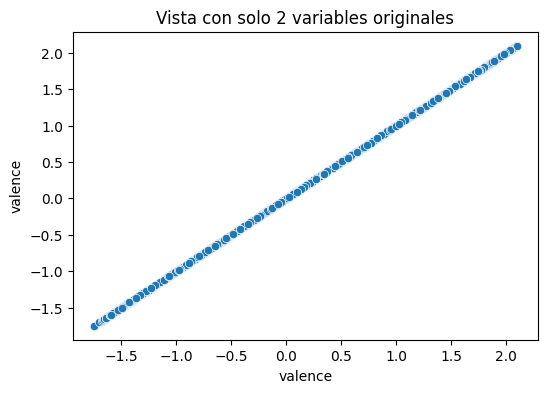

In [ ]:
for column in numerical_cols:
  plt.figure(figsize=(6,4))
  sns.scatterplot(x=spotify['valence'], y=spotify[column], palette='Set1')
  plt.title('Vista con solo 2 variables originales')
  plt.xlabel('valence')
  plt.ylabel(column)
  plt.show()

crear los varibles X y Y
dónde X son mis variables númericas
Y es lo que quiero predecir

In [ ]:
# Exclude the 'popularity' column
X = spotify[numerical_cols]

# Display the first few rows of X to verify
display(X.head())

popularity  acousticness  danceability  duration_ms    energy  \
0   -2.261007      0.683376     -0.890935    -1.141368  1.286908   
1   -2.206031     -0.345467      0.191994    -0.821867  0.630249   
2   -2.096080      1.644570      0.585296    -0.545298 -1.669954   
3   -2.261007      0.942701     -1.693703    -0.695295 -0.929789   
4   -2.041104      1.638932     -1.203422    -1.282184 -1.313157   

   instrumentalness  liveness  loudness  speechiness     tempo   valence  
0         -0.489819  0.660661  1.290703    -0.367970  1.595607  1.380744  
1         -0.489819 -0.322835  0.668683    -0.183082  1.823253  1.388435  
2         -0.489819 -0.564927 -0.718402    -0.455832 -0.588326 -0.334212  
3         -0.489819 -0.587623 -0.434817    -0.438044  1.750597 -0.876384  
4         -0.083566 -0.065613 -1.930601    -0.405163  0.741433 -0.249618

PCA

[[ 9.90450208e-01  9.99392473e-01 -1.59710793e-01 ... -1.32010028e+00
   4.24621093e-01 -5.76060019e-01]
 [ 1.20961308e+00  2.73041969e-01 -6.84229099e-01 ... -9.08359155e-01
  -4.47883358e-01  5.74342270e-02]
 [-2.11240230e+00  3.53161907e-01 -1.86682122e+00 ... -1.46287641e+00
  -4.42066474e-01  8.72498098e-01]
 ...
 [-3.25069018e-01  1.97372584e-01 -1.67204781e+00 ... -5.06901663e-01
   5.86735294e-01 -1.47518739e+00]
 [ 1.06009706e+00  6.41135518e-01 -3.42010025e-01 ...  4.97256058e-05
   9.32347412e-02  5.77890314e-01]
 [ 7.49828728e-01 -6.66644899e-01 -2.37544888e-01 ... -4.94023270e-01
  -4.91557494e-01  8.58881831e-01]]


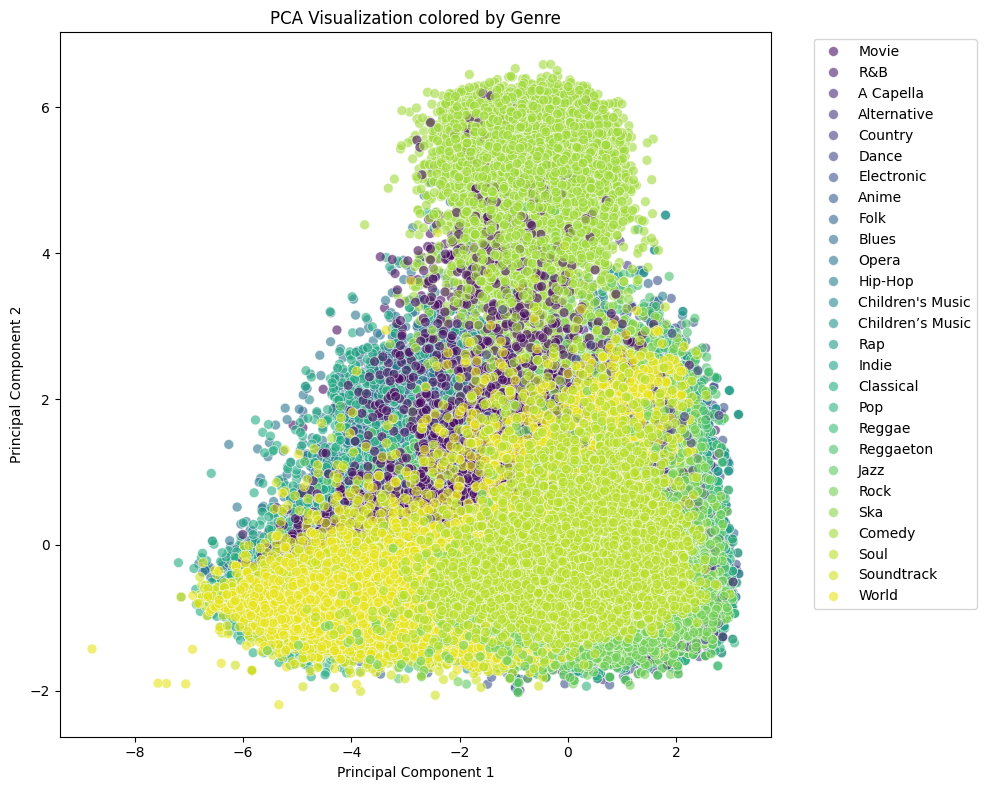

In [ ]:
pca = PCA(0.96)
X_pca = pca.fit_transform(X)
print(X_pca)

plt.figure(figsize=(10, 8)) # Increased figure size for better visibility
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=spotify['genre'], palette='viridis', s=50, alpha=0.6) # Plot with genre as hue
plt.title('PCA Visualization colored by Genre')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.tight_layout()
plt.show()

T-SNe

In [ ]:
X2 = X.head(50000)
display(X2.head())

popularity  acousticness  danceability  duration_ms    energy  \
0   -2.261007      0.683376     -0.890935    -1.141368  1.286908   
1   -2.206031     -0.345467      0.191994    -0.821867  0.630249   
2   -2.096080      1.644570      0.585296    -0.545298 -1.669954   
3   -2.261007      0.942701     -1.693703    -0.695295 -0.929789   
4   -2.041104      1.638932     -1.203422    -1.282184 -1.313157   

   instrumentalness  liveness  loudness  speechiness     tempo   valence  
0         -0.489819  0.660661  1.290703    -0.367970  1.595607  1.380744  
1         -0.489819 -0.322835  0.668683    -0.183082  1.823253  1.388435  
2         -0.489819 -0.564927 -0.718402    -0.455832 -0.588326 -0.334212  
3         -0.489819 -0.587623 -0.434817    -0.438044  1.750597 -0.876384  
4         -0.083566 -0.065613 -1.930601    -0.405163  0.741433 -0.249618

In [ ]:
tsne = TSNE(n_components=2, perplexity=20)
X_tsne = tsne.fit_transform(X2)

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], palette='Paired')
plt.title('Visualización usando t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

KeyboardInterrupt: 

Clustering


In [ ]:
# KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)

In [ ]:
from sklearn.metrics import silhouette_score
score_kmeans = silhouette_score(X_pca, labels_kmeans)
print(f"Silhouette Score KMeans: {score_kmeans:.2f}")

KeyboardInterrupt: 

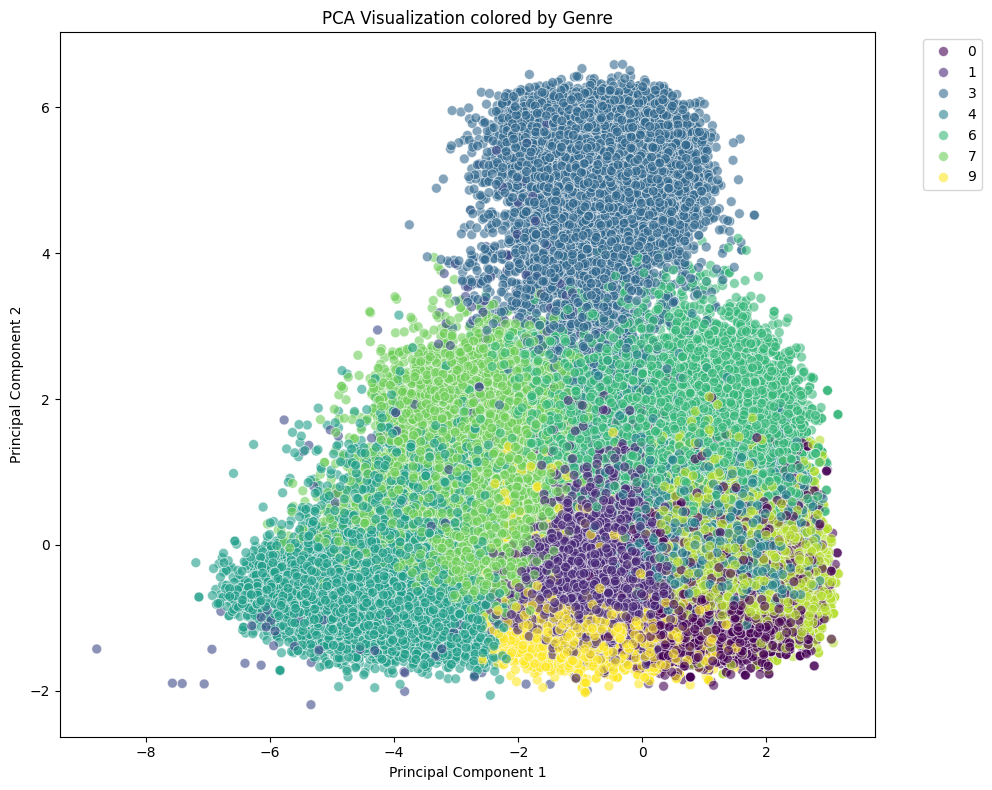

In [ ]:
plt.figure(figsize=(10, 8)) # Increased figure size for better visibility
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_kmeans, palette='viridis', s=50, alpha=0.6) # Plot with genre as hue
plt.title('PCA Visualization colored by Genre')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.tight_layout()
plt.show()

col_0                0     1   2     3     4     5     6     7     8     9
genre                                                                     
A Capella            1     2   0     0    24     0     0    92     0     0
Alternative       3138  1630   1     6   293    19   556    26  3153   441
Anime             2963   429   4     0  1658  1356   320   470   354  1382
Blues             1852  1560  18    19  2714    53  1059   527   575   646
Children's Music    68    35   2   165  3296   216    81  1043     1   496
Children’s Music  2952  1730   0     7   140    15   516    16  3597   380
Classical          384   205  98    15    39  6095    79  2000    66   275
Comedy              35    80  64  8978   249     0   150   114    11     0
Country           2426  2162   0     1  1217     2   378   108  2354    16
Dance             1580  1049   0     0   273     8   433     3  5117   238
Electronic        2377   553  11     5   841   134   792    38  1350  3276
Folk              1267  4209   2     3   655   211   385   525  1560   482
Hip-Hop           1251  1019   0    27   104     0   563     1  6264    66
Indie             1725  3333   0     3   191   100   305   119  3177   590
Jazz               448  2086  11    15  1378   906   365   714   731  2787
Movie              217   438  59   333  2276   937   373  3048    22   103
Opera                1    26  20    28     7  1991    69  6091     0    47
Pop               1422  1747   0     2    16    29   334     7  5763    66
R&B               1188  2836   1    13   451    12   383    53  3886   169
Rap               1388  1045   0    19    46     5   523     0  6166    40
Reggae            1077   491   2     9  4690     1   603    30  1560   308
Reggaeton         1555   313  14     3  4118     0   614     0  2302     8
Rock              2475  1881   2     1   140    61   446    20  3934   312
Ska               3335   155   1    11  3425     0  1021    28   514   384
Soul              1017  3190   1     9  1259    88   474   203  2447   401
Soundtrack          49   220   7     3    33  7320    22   627     6  1359
World             1794  2061  51     3   697  1287  1189   657   317  1040

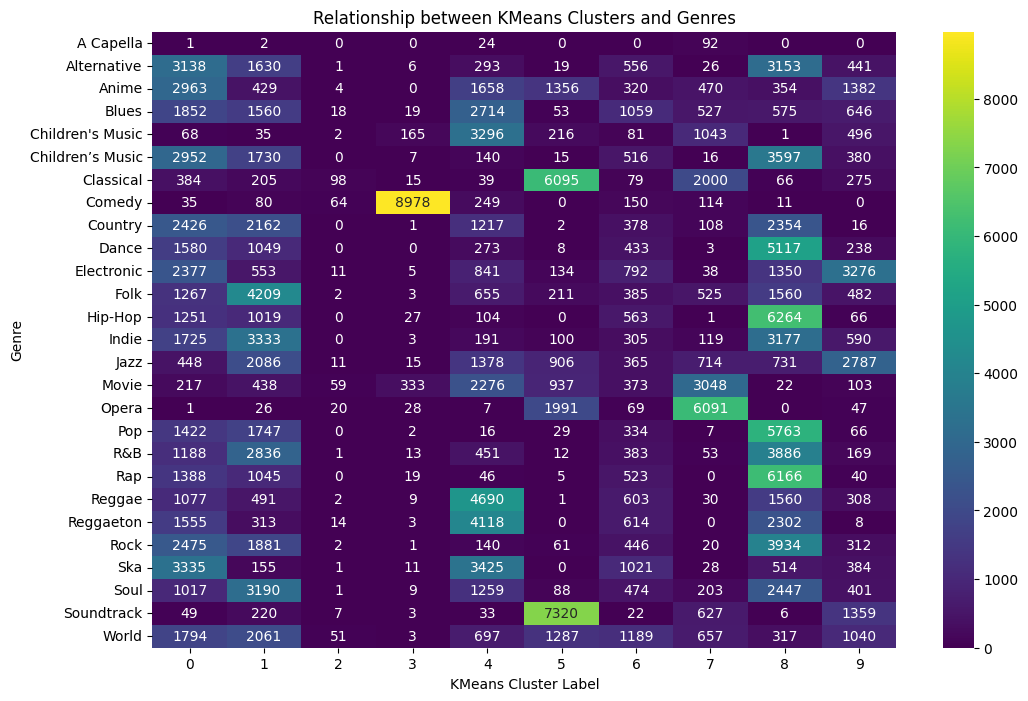

In [ ]:
# Create a cross-tabulation of KMeans labels and genre
cross_tab = pd.crosstab(spotify['genre'], labels_kmeans)

# Display the cross-tabulation
display(cross_tab)

# Visualize the cross-tabulation as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between KMeans Clusters and Genres')
plt.xlabel('KMeans Cluster Label')
plt.ylabel('Genre')
plt.show()

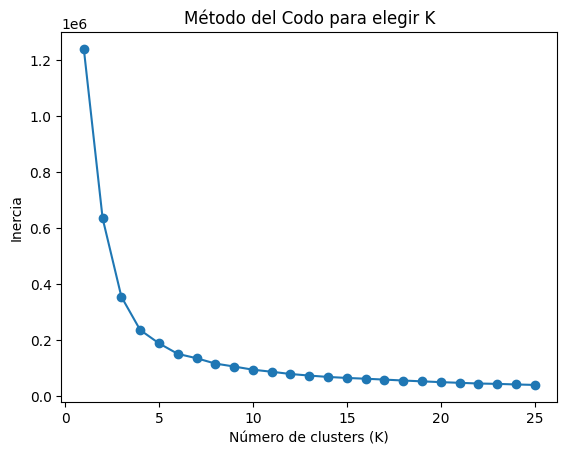

In [ ]:
inertias = []
k_range = range(1, 26)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertias.append(km.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.title('Método del Codo para elegir K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.show()

In [ ]:
# Add the KMeans cluster labels to the original spotify DataFrame
spotify['kmeans_label'] = labels_kmeans

# Group by KMeans label and calculate the mean of the numerical columns
cluster_means = spotify.groupby('kmeans_label')[numerical_cols].mean()

# Display the average characteristics for each cluster
display(cluster_means)

popularity  acousticness  danceability  duration_ms    energy  \
kmeans_label                                                                  
0               0.557763     -0.548630      0.007158     0.147169  0.119726   
1              -1.019488      1.225009     -0.252658    -0.288326 -1.052108   
2              -0.077222     -0.577318      0.449886    -0.128898  0.619026   
3              -1.516603      1.618685     -1.543374     0.202073 -1.762242   
4              -1.248625      1.282952     -0.053499     0.137983  0.001207   
5               0.954214     -0.855871      0.604468    -0.156793  0.933882   
6              -0.518009      1.515287     -1.672852     0.299097 -1.777679   
7              -0.079695     -0.067169      0.272112    -0.034579 -0.023383   
8              -1.624687      1.540459     -0.939769     0.327938 -1.357738   
9               0.304045     -0.745188      0.471179    -0.111022  0.761413   
10             -0.272331     -0.436564      0.143578     0.057012  0.768818   
11              0.331895     -0.035982     -0.088396     0.229567 -0.306327   
12             -0.327831     -0.162913      0.304891    -0.094064  0.238811   
13              0.178377     -0.546872      0.327628    -0.021425  0.368178   
14              0.080227     -0.682314      0.573856    -0.144854  0.931039   
15             -0.436469      1.254132     -1.254003     0.103413 -1.394885   
16             -1.339916      1.540160     -1.004701    -0.165862 -1.438744   
17             -0.766659      1.634715     -1.939630     0.504779 -2.024456   
18              0.196629      0.622641     -0.302214     0.166740 -0.750587   
19              0.360539     -0.798509      0.706481    -0.183552  1.008232   
20             -0.817992      0.684326     -0.052705     0.038381 -0.469776   
21             -1.378426      1.130215      0.129135     0.332988 -0.374435   
22             -0.480054      0.602884      0.153408    -0.134640 -0.522522   
23             -1.008952      1.212469      0.061441    -0.214478  0.842846   
24             -0.080781      1.006956     -0.698969     0.077963 -1.097459   
25              0.850218     -0.796129      0.223671    -0.020378  0.550173   

              instrumentalness  liveness  loudness  speechiness     tempo  \
kmeans_label                                                                
0                     0.006781 -0.516526  0.318741    -0.385967  0.289738   
1                    -0.027296 -0.055807 -0.551368    -0.303561 -0.349472   
2                    -0.421973  0.143695  0.539223     0.155928 -0.001109   
3                     0.574396 -0.030888 -2.073366    -0.382701 -0.793930   
4                    -0.488292  2.962086 -1.041772     4.321712 -0.867833   
5                    -0.457491 -0.500863  0.803761    -0.265222  0.552873   
6                     2.215681 -0.524137 -2.110057    -0.421417 -0.518854   
7                    -0.249144 -0.166279  0.158637    -0.157627 -0.165444   
8                    -0.138526  1.857862 -1.523668     0.108158 -0.610517   
9                    -0.434231 -0.275848  0.661439    -0.158138  0.253441   
10                   -0.419493  2.615475  0.492188     0.558496 -0.009592   
11                    0.219117 -0.484970  0.028231    -0.405949  0.096264   
12                   -0.346041  0.695257  0.251049     0.347164 -0.184849   
13                   -0.331728 -0.302741  0.414312    -0.226146  0.009235   
14                   -0.450321  1.127292  0.734842     0.413155  0.127459   
15                    1.947896 -0.506402 -1.328321    -0.424830 -0.135342   
16                    0.181922 -0.189787 -1.169093    -0.361462 -0.495892   
17                    2.278296 -0.515342 -3.252989    -0.409851 -1.010518   
18                    0.385312 -0.480227 -0.295200    -0.419565  0.017551   
19                   -0.469843  0.158754  0.820628     0.077486  0.365064   
20                   -0.286652  1.484994 -0.238331     0.315682 -0.231950   
21                   -0.471095